In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('D:/dataset1/empl.csv')
print(df.shape)
df.head()

(22, 6)


,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [4]:
df.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [5]:
df.isnull().any()

SNo        False
Name       False
Age         True
City        True
Country    False
Salary      True
dtype: bool

In [6]:
df.dropna(axis=0)

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
10,12,Anik,26.0,HongKong,Asia,66672.0
12,14,Geet,22.0,HongKong,Asia,30007.0
14,16,Ram,38.0,Hyderabad,Asia,54666.0


# Univariate Analysis

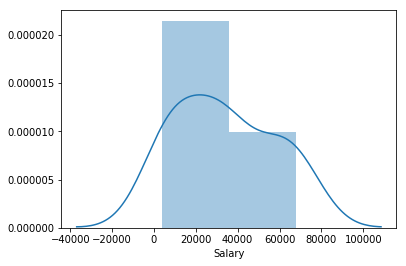

In [7]:
sns.distplot(df['Salary'])
plt.show()

In [8]:
df.Salary.value_counts().head()

30007.0    2
54666.0    2
66672.0    2
67666.0    2
8888.0     2
Name: Salary, dtype: int64

# Bivariate Analysis

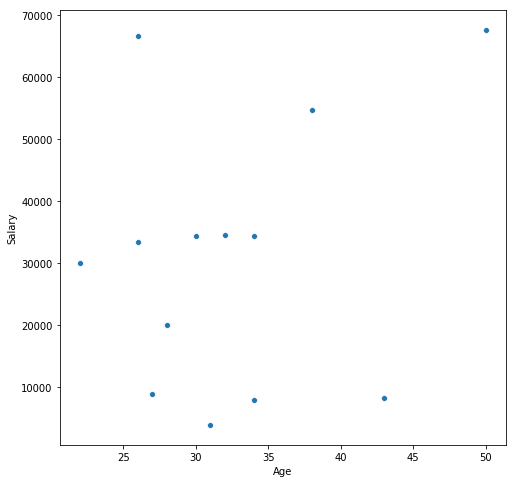

In [3]:
plt.figure(figsize=(8,8))
sns.scatterplot(y='Salary',x='Age',data=df)
plt.show()

In [11]:
#which Age has highest average Salary
df.groupby(['Age']).agg({'Salary': 'mean'}).sort_values(by= 'Salary', ascending = False).head()

,Salary
Age,
50.0,67666.000000
26.0,55598.333333
38.0,54666.000000
32.0,34534.000000
30.0,34344.000000


# Heatmap

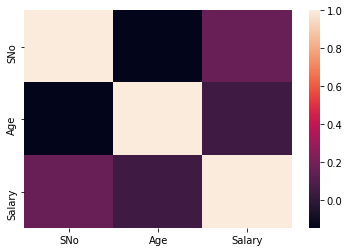

In [12]:
heat_map = sns.heatmap(df.corr())

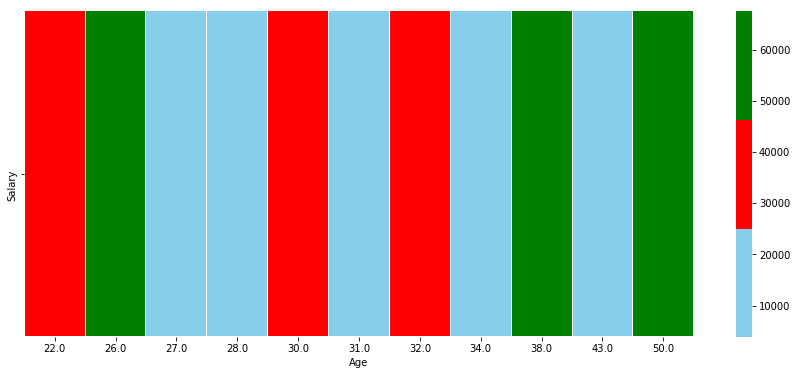

In [13]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(df,columns='Age',values=["Salary"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

# One-hot encoding

In [3]:
Feature = df[['Age','City']]
Feature = pd.concat([Feature,pd.get_dummies(df['City'])], axis=1)
Feature.drop(['City'], axis=1, inplace=True)
Feature.head()

,Age,Angola,BayArea,Congo,Edmonto,Finland,HongKong,Hyderabad,London,Toronto,newyork
0,28.0,0,0,0,0,0,0,0,0,1,0
1,31.0,0,0,0,1,0,0,0,0,0,0
2,34.0,0,0,0,0,0,0,0,0,1,0
3,26.0,0,0,0,0,0,1,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,0


# Removing outliers

In [4]:
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
z = np.abs(stats.zscore(Feature))
Feature = Feature[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

# Modeling

In [7]:
X=Feature.iloc[:,:]
y=df['Salary'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [9]:
#Model fitting
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_hat = regressor.predict(X_test)

In [13]:
def r2_score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0
    ss_tot = 0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2
print("R-squared error:",r2_score(y_test, y_hat))
#R-squared is neagtive because the model fits worse than a horizontal line.

R-squared error: -0.7023425670125938


In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = 4

neighK6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK6
 
yhat = neighK6.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighK6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(yhat, neighK6.predict(X_test)))

Train set Accuracy:  0.6666666666666666
Test set Accuracy:  1.0


In [30]:
import pickle
saved_model = pickle.dumps(LinearRegression) 